* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 12: Q-learning </h1>

<pre align="left"> November 21st 2022               <i> Author: Hicham Janati </i></pre>
* * *



Q-learning is a classical example of reinforcement learning where an agent learns from its environment by taking actions and learning from rewards and penalties. For the sake of simplicity consider the following environment where the agent's initial state is at the Start position. It can take actions (left, right, up, down). The game ends either when it's game-over (Death cell) or the agent reaches the Exit. Each instance of a game is called an episode. The agent plays a certain number of episodes (i.e training) and continuously updates the actions it should take depending on which state it is. 

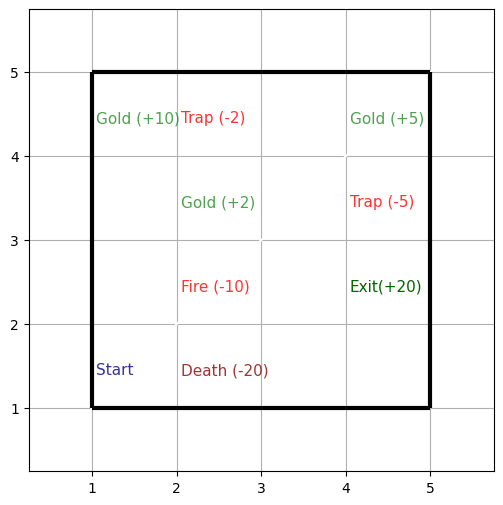

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def plot_maze():
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    xs = np.linspace(0.5, 5.5, 4)
    ys = np.linspace(0.5, 5.5, 4)
    s = 11
    ax.plot(xs, ys, color="white")
    ax.hlines(1, 1, 5, color="k", lw=3)
    ax.vlines(1, 1, 5, color="k", lw=3)
    ax.hlines(5, 1, 5, color="k", lw=3)
    ax.vlines(5, 1, 5, color="k", lw=3)
    ax.text(1.05, 1.4, "Start", color="navy", fontsize=s, alpha=0.8)
    ax.text(4.05, 2.4, "Exit(+20)", color="darkgreen", fontsize=s, alpha=1.)
    ax.text(2.05, 2.4, "Fire (-10)", color="red", fontsize=s, alpha=0.8)
    ax.text(4.05, 4.4, "Gold (+5)", color="forestgreen", fontsize=s, alpha=0.8)
    ax.text(4.05, 3.4, "Trap (-5)", color="red", fontsize=s, alpha=0.8)
    ax.text(1.05, 4.4, "Gold (+10)", color="forestgreen", fontsize=s, alpha=0.8)
    ax.text(2.05, 4.4, "Trap (-2)", color="red", fontsize=s, alpha=0.8)
    ax.text(2.05, 3.4, "Gold (+2)", color="forestgreen", fontsize=s, alpha=0.8)
    ax.text(2.05, 1.4, "Death (-20)", color="darkred", fontsize=s, alpha=0.8)
    ax.grid()
    plt.show()
plot_maze()

There are 16 possible states in this environment. At each state, the agent can take 4 actions. We can represent the "quality" of a pair (state, action) i.e taking action a while being at state s in a matrix Q (16 x 4) that we initialize to 0.

### Question 1
Create an array of size (16, 2) with all the state coordinates using the square grid:

In [3]:
grid = np.linspace(1.5, 4.5, 4)

state_positions = 

The rewards of each state: 

In [6]:
rewards = np.array([0, -20, 0, 0, 0, -10, 0, 20, 0, 2, 0, -5, 10, -2, 0, 5])

### Question 2
We use the convention: 0 = Left, 1 = Down, 2 = Right, 3 = Up. 
Implement a function `get_possible_actions` that takes an int (0-15) (id of an element of `state_positions`) and returns a list of possible actions. This function must **only** make sure the next action remains within the boundary of the maze.

In [8]:
action_steps = np.array([[-1, 0], [0, -1], [0, 1], [0, 1]])

def get_possible_actions(state_id):
    state = state_positions[state_id]

    return actions

get_possible_actions(0)

array([2, 3])

The process goes as follows. Let's assume the agent is at state $s_t$.

1. To take an action, the agent can either:
- explore: select a random action among the allowed actions (cannot go outside the maze)
- or exploit: select an action maximizing the quality of the pair-actions possible (i.e using the Q table)

The main idea of Q-learning is to decide randomly between explore / exploit with a tendency to explore more in the beginning and exploit at the end. Let epsilon be the probability of deciding to explore. We initialize epsilon = 1 and decrease gradually after each episode. 

2. Once the action $a_t$ is taken, the agent is now in $s_{t+1}$ and has obtained a reward $r_t$ (the new cell score) which can be used to update the quality of taking $a_t$ while being in the (previous) state $s_t$:

$$ Q(s_t, a_t) = Q(s_t, a_t) + \alpha (r_t + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) $$

Where:
- $\alpha$ is the learning rate (weight given to how much correction should be applied at each step)
- $\gamma \in [0,1] $  is the 'discount' rate, which lowers the importance of 'future' rewards compared to immediate ones. It is usually taken around 0.95-1.

### Question 3
Complete the code below that performs the training of the agent. To avoid infinite loops, we set a max number of steps per episode (game) to 30.

In [17]:
num_episodes = 10
max_steps = 30
rng = np.random.default_rng(42)
epsilon = 1.
learning_rate = 0.1
Q = np.zeros((16, 4))
discount_rate = 0.99
decay_rate = 0.99
# training
training_paths = []

for episode in range(num_episodes):
    state = 0
    path = [0]
    for s in range(max_steps):
        
        # decide to explore or exploit
        action = 
        # take the action to get a new state
        new_state = 
        
        
        path.append(new_state)

        # Update quality given the new reward
        reward = 
        Q[state,action] = Q[state,action] + learning_rate * (reward + discount_rate * np.max(Q[new_state, :])-Q[state, action])
    
        # if gameover or won, finish episode
        if :
            break
    
    training_paths.append(path)
    # Decrease epsilon
    epsilon = np.exp(-decay_rate*episode)
    print(f"epsilon = {epsilon}")

print(f"Training completed over {num_episodes} episodes")


epsilon = 1.0
epsilon = 0.3715766910220457
epsilon = 0.13806923731089282
epsilon = 0.051303310331919136
epsilon = 0.019063114291611637
epsilon = 0.0070834089290521185
epsilon = 0.0026320296510132005
epsilon = 0.0009780008683953946
epsilon = 0.0003634023264950478
epsilon = 0.00013503183398874292
Training completed over 10 episodes


### Question 4
Use the matplotlib code above, visualize the paths of your agent as it is learning. Does it converge ?

### Question 5
Visualize the evolution of the Q matrix using a plt.imshow. 